In [2]:
#importing the useful libraries

import numpy as np
import pandas as pd
import seaborn as sns; sns.set(color_codes=True)
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#Reading the data from local
store_df = pd.read_csv("C:\\Users\\hp\\Downloads\\SampleSuperstore - SampleSuperstore.csv")

In [4]:
store_df

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


In [5]:
#The function "shape" returns the lenghts of an array dimension.
store_df.shape

(9994, 13)

In [6]:
#isnull() function detect missing values in the particular columns. 
store_df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [7]:
#nunique() function return number of unique elements in the object. It returns a scalar value which is the count of all the unique values in the Index.
for i in store_df.columns:
    print(i,store_df[i].nunique())

Ship Mode 4
Segment 3
Country 1
City 531
State 49
Postal Code 631
Region 4
Category 3
Sub-Category 17
Sales 5825
Quantity 14
Discount 12
Profit 7287


In [8]:
store_df.drop(['Country', 'Postal Code'], axis = 1, inplace = True)

In [9]:
store_df['Ship Mode'].unique()

array(['Second Class', 'Standard Class', 'First Class', 'Same Day'],
      dtype=object)

In [10]:
store_df['Segment'].unique()

array(['Consumer', 'Corporate', 'Home Office'], dtype=object)

In [11]:
store_df['Category'].unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

D:\New folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\New folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


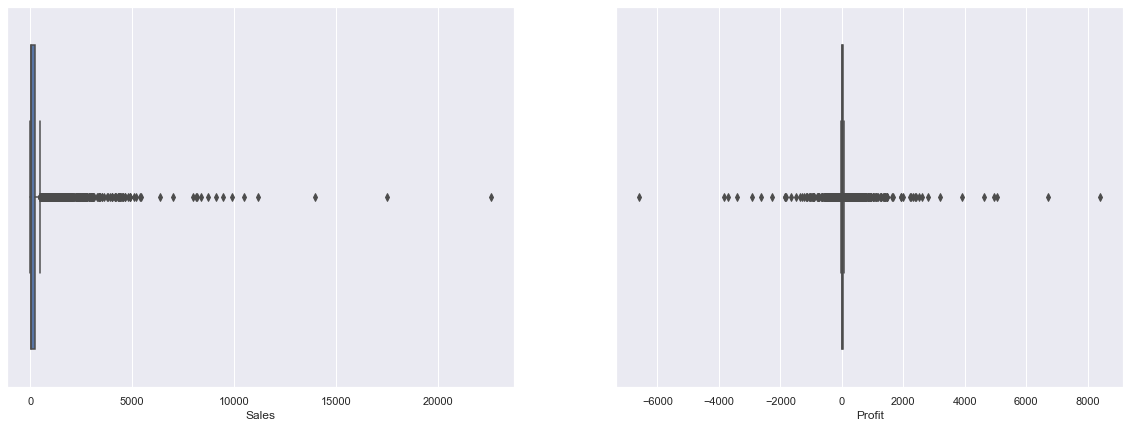

In [12]:
plt.subplot(1, 2, 1)
sns.boxplot(store_df['Sales'])

plt.subplot(1, 2, 2)
sns.boxplot(store_df['Profit'])

plt.gcf().set_size_inches(20, 7)

In [13]:
profit_mean, profit_std = store_df['Profit'].mean(), store_df['Profit'].std()
# identify outliers
cut_off = profit_std * 3
lower, upper = profit_mean - cut_off, profit_mean + cut_off
# identify outliers
outliers = [x for x in store_df['Profit'] if x < lower or x > upper]
print('Identified outliers in Profit: %d' % len(outliers))

Identified outliers in Profit: 107


D:\New folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\New folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


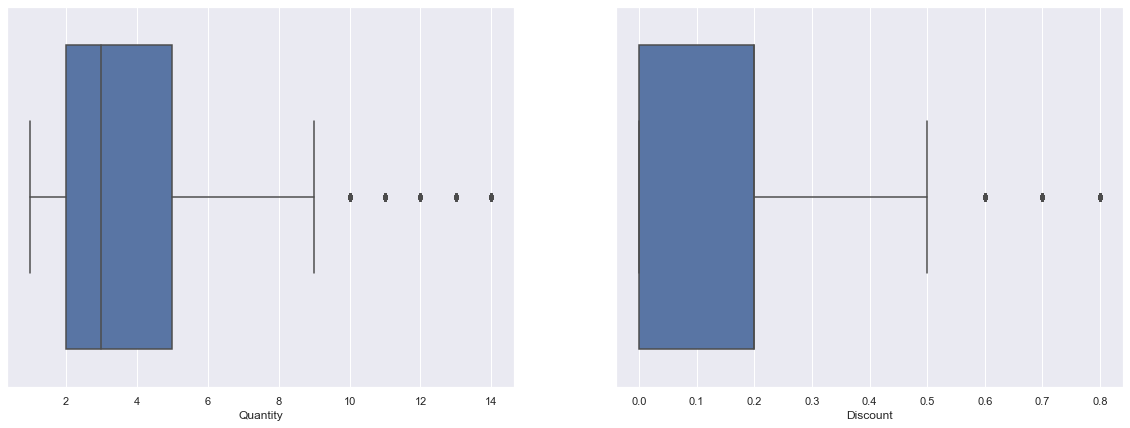

In [14]:
plt.subplot(1, 2, 1)
sns.boxplot(store_df['Quantity'])

plt.subplot(1, 2, 2)
sns.boxplot(store_df['Discount'])

plt.gcf().set_size_inches(20, 7)

In [15]:
discount_mean, discount_std = store_df['Discount'].mean(), store_df['Discount'].std()
# identify outliers
cut_off = discount_std * 3
lower, upper = discount_mean - cut_off, discount_mean + cut_off
# identify outliers
outliers = [x for x in store_df['Discount'] if x < lower or x > upper]
print('Identified outliers: %d' % len(outliers))

Identified outliers: 300


In [16]:
Quantity_mean, Quantity_std = store_df['Quantity'].mean(), store_df['Quantity'].std()
# identify outliers
cut_off = Quantity_std * 3
lower, upper = Quantity_mean - cut_off, Quantity_mean + cut_off
# identify outliers
outliers = [x for x in store_df['Quantity'] if x < lower or x > upper]
print('Identified outliers: %d' % len(outliers))

Identified outliers: 113


In [18]:
for i in ['Sales']:
    q3, q1 = np.percentile(store_df.loc[: , i],[75,25])
    iqr = q3 - q1
    
    
    max = q3 + (1.5 * iqr)
    min = q1 - (1.5 * iqr)
    
    #Replacing the Outlier Values with Nan
    
    store_df.loc[store_df[i] < min, i] = np.nan
    store_df.loc[store_df[i] > max, i] = np.nan

<AxesSubplot:xlabel='Sales'>

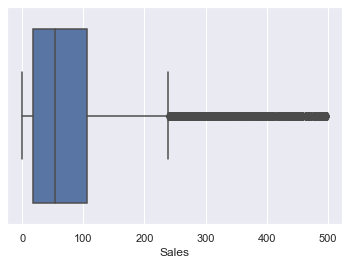

In [19]:
store_df['Sales'].fillna(store_df['Sales'].mean(), inplace = True)
sns.boxplot(x = store_df['Sales'])

In [20]:
for i in ['Profit']:
    q3, q1 = np.percentile(store_df.loc[: , i],[75,25])
    iqr = q3 - q1
    
    
    max = q3 + (1.5 * iqr)
    min = q1 - (1.5 * iqr)
    
    #Replacing the Outlier Values with Nan
    
    store_df.loc[store_df[i] < min, i] = np.nan
    store_df.loc[store_df[i] > max, i] = np.nan

<AxesSubplot:xlabel='Profit'>

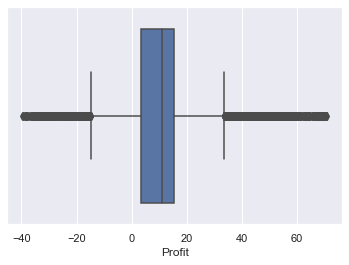

In [21]:
store_df['Profit'].fillna(store_df['Profit'].mean(), inplace = True)
sns.boxplot(x = store_df['Profit'])

In [22]:
for i in ['Discount']:
    q3, q1 = np.percentile(store_df.loc[: , i],[75,25])
    iqr = q3 - q1
    
    
    max = q3 + (1.5 * iqr)
    min = q1 - (1.5 * iqr)
    
    #Replacing the Outlier Values with Nan
    
    store_df.loc[store_df[i] < min, i] = np.nan
    store_df.loc[store_df[i] > max, i] = np.nan

<AxesSubplot:xlabel='Discount'>

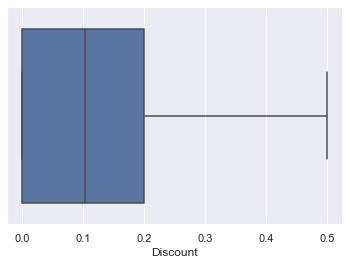

In [23]:
store_df['Discount'].fillna(store_df['Discount'].mean(), inplace = True)
sns.boxplot(x = store_df['Discount'])

In [24]:
for i in ['Quantity']:
    q3, q1 = np.percentile(store_df.loc[: , i],[75,25])
    iqr = q3 - q1
    
    
    max = q3 + (1.5 * iqr)
    min = q1 - (1.5 * iqr)
    
    #Replacing the Outlier Values with Nan
    
    store_df.loc[store_df[i] < min, i] = np.nan
    store_df.loc[store_df[i] > max, i] = np.nan

<AxesSubplot:xlabel='Quantity'>

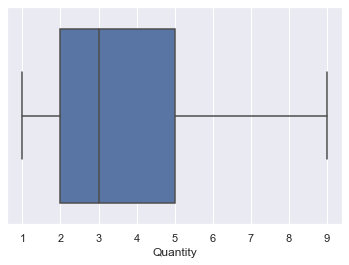

In [25]:
store_df['Quantity'].fillna(store_df['Quantity'].mean(), inplace = True)
sns.boxplot(x = store_df['Quantity'])

In [26]:
store_df

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.960000,2.0,0.00,41.913600
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,92.864853,3.0,0.00,11.604086
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.620000,2.0,0.00,6.871400
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,92.864853,5.0,0.45,11.604086
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.368000,2.0,0.20,2.516400
...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,Miami,Florida,South,Furniture,Furnishings,25.248000,3.0,0.20,4.102800
9990,Standard Class,Consumer,Costa Mesa,California,West,Furniture,Furnishings,91.960000,2.0,0.00,15.633200
9991,Standard Class,Consumer,Costa Mesa,California,West,Technology,Phones,258.576000,2.0,0.20,19.393200
9992,Standard Class,Consumer,Costa Mesa,California,West,Office Supplies,Paper,29.600000,4.0,0.00,13.320000


In [27]:
(store_df['Ship Mode'].value_counts()/store_df.shape[0])*100

Standard Class    59.715829
Second Class      19.461677
First Class       15.389234
Same Day           5.433260
Name: Ship Mode, dtype: float64

<AxesSubplot:xlabel='Ship Mode', ylabel='Count'>

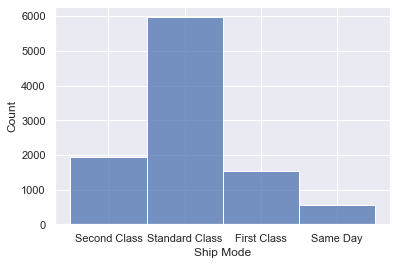

In [28]:
sns.histplot(store_df['Ship Mode'])

In [29]:
(store_df['Segment'].value_counts()/store_df.shape[0])*100

Consumer       51.941165
Corporate      30.218131
Home Office    17.840704
Name: Segment, dtype: float64

<AxesSubplot:xlabel='Segment', ylabel='Count'>

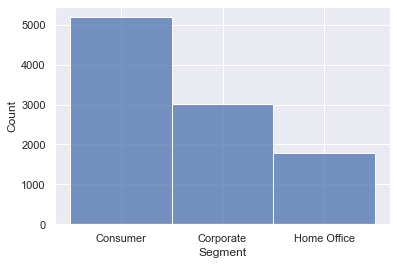

In [30]:
sns.histplot(store_df['Segment'])

In [31]:
(store_df['Category'].value_counts()/store_df.shape[0])*100

Office Supplies    60.296178
Furniture          21.222734
Technology         18.481089
Name: Category, dtype: float64

<AxesSubplot:xlabel='Category', ylabel='Count'>

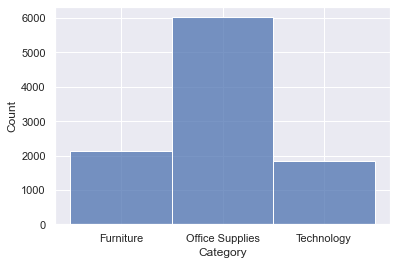

In [32]:
sns.histplot(store_df['Category'])

In [33]:
(store_df['Sub-Category'].value_counts()/store_df.shape[0])*100

Binders        15.239143
Paper          13.708225
Furnishings     9.575745
Phones          8.895337
Storage         8.465079
Art             7.964779
Accessories     7.754653
Chairs          6.173704
Appliances      4.662798
Labels          3.642185
Tables          3.191915
Envelopes       2.541525
Bookcases       2.281369
Fasteners       2.171303
Supplies        1.901141
Machines        1.150690
Copiers         0.680408
Name: Sub-Category, dtype: float64

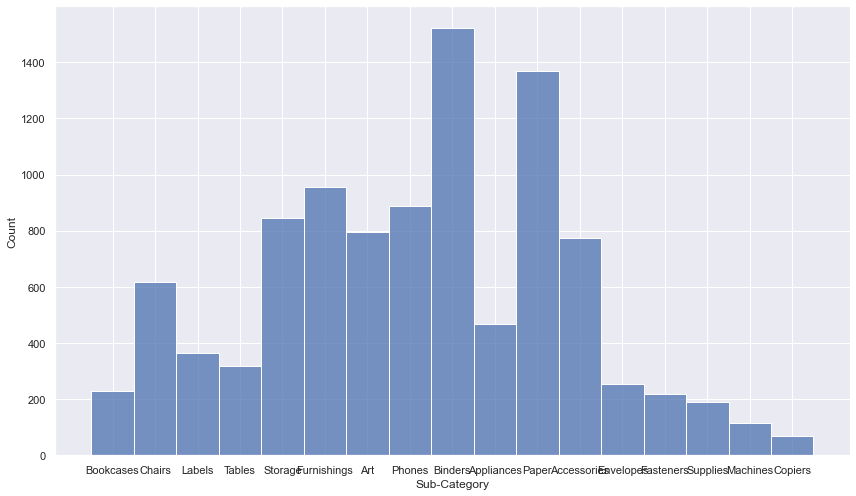

In [34]:
sns.histplot(store_df['Sub-Category'])
plt.gcf().set_size_inches(12,7)
plt.tight_layout()

<AxesSubplot:xlabel='Category'>

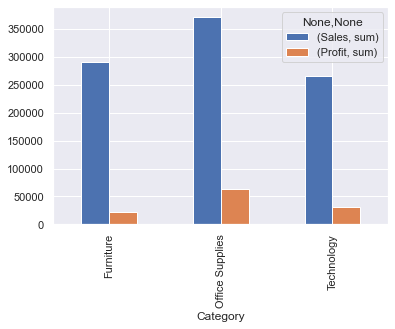

In [35]:
store_df.groupby('Category')[['Sales', 'Profit']].agg(['sum']).plot.bar()

<AxesSubplot:xlabel='Region', ylabel='count'>

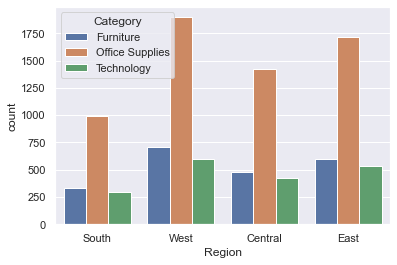

In [36]:
sns.countplot(x=store_df['Region'], hue = store_df['Category'])

D:\New folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


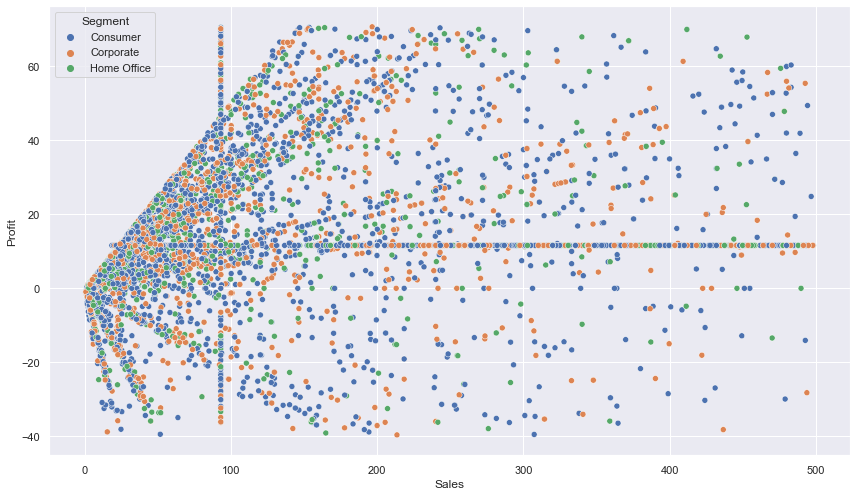

In [37]:
sns.scatterplot(store_df['Sales'], store_df['Profit'], hue = store_df['Segment'])
plt.gcf().set_size_inches(12,7)
plt.tight_layout()

In [38]:
highprofit = store_df.groupby(['City','Category']).mean().sort_values('Profit', ascending = False)[['Sales', 'Profit']]
highprofit

,,Sales,Profit
City,Category,,
Las Vegas,Technology,92.864853,70.1955
Orland Park,Technology,339.960000,67.9920
Rome,Technology,269.980000,67.4950
Gaithersburg,Technology,231.980000,67.2742
Mentor,Technology,239.976000,65.9934
...,...,...,...
San Angelo,Office Supplies,11.648000,-30.8672
Allen,Furniture,244.006000,-31.3722
Commerce City,Office Supplies,146.352000,-32.9292


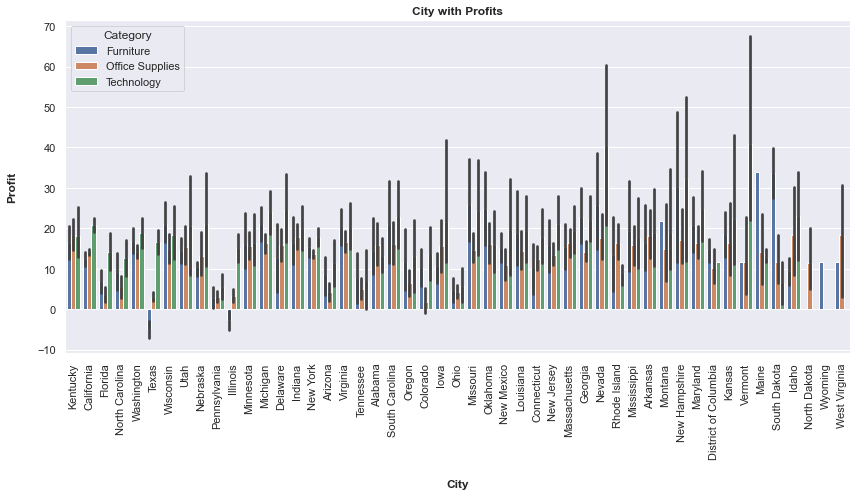

In [41]:

txt = {'weight':'bold'}
sns.barplot(x = store_df['State'], y= store_df['Profit'], hue = store_df['Category'])
plt.title("City with Profits", fontdict = txt)
plt.xticks(rotation = 90)
plt.xlabel('City', fontdict = txt, labelpad = 20)
plt.ylabel('Profit', fontdict = txt, labelpad = 20)

plt.gcf().set_size_inches(12, 7)
plt.tight_layout()

In [42]:
top6_subcategories = ['Binders','Paper','Furnishings','Phones','Storage','Art']
region_subCategories_df = store_df.groupby(['Region','Sub-Category']).size().unstack()
region_subCategories_df = region_subCategories_df[top6_subcategories]
region_subCategories_df

Sub-Category,Binders,Paper,Furnishings,Phones,Storage,Art
Region,,,,,,
Central,366,321,205,200,210,176
East,440,378,283,272,242,228
South,246,221,165,140,128,142
West,471,450,304,277,266,250


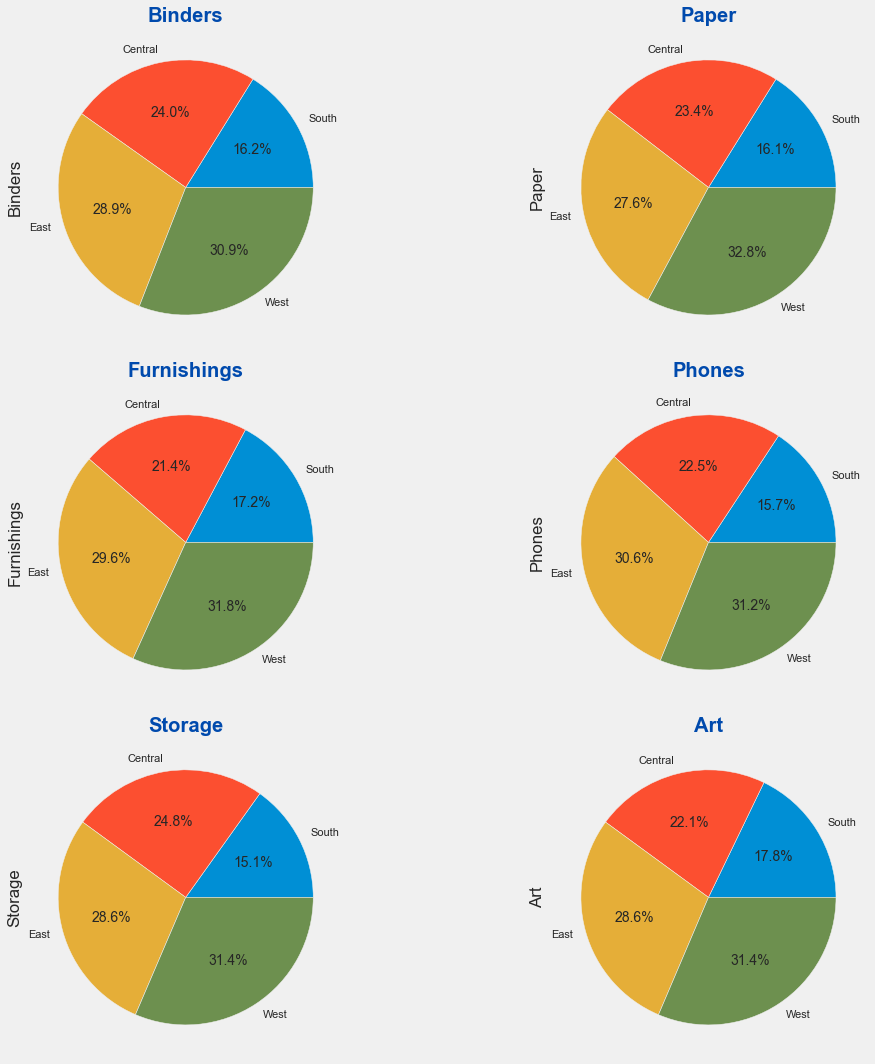

In [43]:
import matplotlib as mpl
mpl.style.use('fivethirtyeight')
col_number = 2
row_number = 3
txt = {'weight' : 'bold'}
fig, axes = plt.subplots(row_number,col_number)

for i, (label,col) in enumerate(region_subCategories_df.iteritems()):
    ax = axes[int(i/col_number), i%col_number]
    col = col.sort_values(ascending=True)
    col.plot(kind='pie', ax=ax, autopct = '%1.1f%%' )
    ax.set_title(label, color = '#004aad', fontdict = txt)
    
plt.gcf().set_size_inches(18, 15)
plt.tight_layout()


In [44]:
top6_subcategories = ['Binders','Paper','Furnishings','Phones','Storage','Art']
region_subCategories_df = store_df.groupby(['State','Sub-Category']).size().unstack()
region_subCategories_df = region_subCategories_df[top6_subcategories]
region_subCategories_df.head()

Sub-Category,Binders,Paper,Furnishings,Phones,Storage,Art
State,,,,,,
Alabama,10.0,8.0,3.0,6.0,3.0,7.0
Arizona,35.0,31.0,21.0,23.0,21.0,14.0
Arkansas,10.0,12.0,5.0,4.0,2.0,6.0
California,276.0,289.0,191.0,172.0,160.0,165.0
Colorado,28.0,19.0,24.0,16.0,13.0,11.0


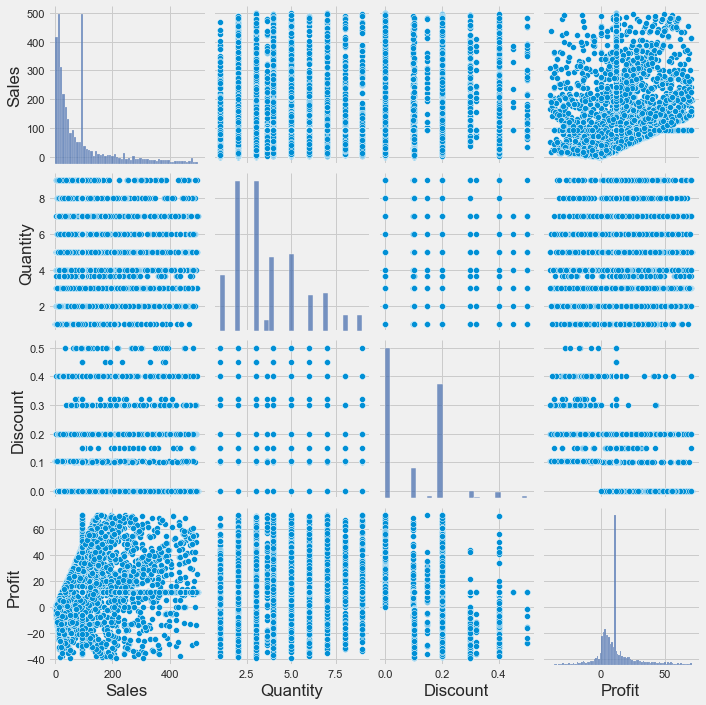

In [45]:
sns.pairplot(store_df)

In [46]:
corr = store_df.corr()
corr

,Sales,Quantity,Discount,Profit
Sales,1.000000,0.137167,0.116204,0.302718
Quantity,0.137167,1.000000,-0.014588,0.156921
Discount,0.116204,-0.014588,1.000000,-0.219412
Profit,0.302718,0.156921,-0.219412,1.000000


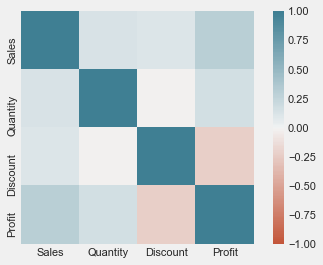

In [47]:
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)

In [50]:
store_df.pivot_table(values =  'Profit', index = 'Segment', columns = 'Discount', aggfunc = 'median')


Discount,0.00000,0.10000,0.10349,0.15000,0.20000,0.30000,0.32000,0.40000,0.45000,0.50000
Segment,,,,,,,,,,
Consumer,11.604086,11.604086,-4.7520,6.549000,7.1974,-3.0852,-6.019600,11.604086,11.604086,11.604086
Corporate,11.604086,11.604086,-3.9624,11.604086,7.2576,-2.6982,11.604086,11.604086,11.604086,11.604086
Home Office,11.604086,13.437200,-6.3330,15.697800,7.9378,-2.3480,11.604086,11.604086,11.604086,11.604086


In [51]:

store_df.pivot_table(values =  'Sales', index = 'Segment', columns = 'Discount', aggfunc = 'median')

Discount,0.00000,0.10000,0.10349,0.15000,0.20000,0.30000,0.32000,0.40000,0.45000,0.50000
Segment,,,,,,,,,,
Consumer,51.900,136.944000,11.6730,239.666,51.540,127.379,156.372800,109.773000,182.787000,145.980000
Corporate,58.580,92.864853,12.0600,282.166,52.184,113.372,149.098826,92.864853,92.864853,92.864853
Home Office,49.645,145.764000,12.2475,119.833,52.680,208.474,196.698826,92.864853,163.362426,92.864853


D:\New folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Discount', ylabel='Profit'>

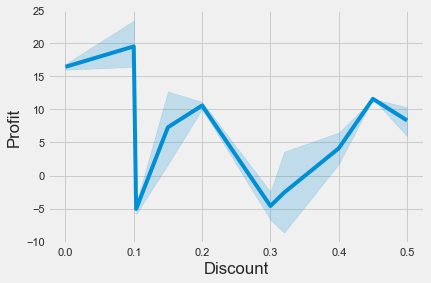

In [52]:
sns.lineplot(store_df['Discount'], store_df['Profit'])

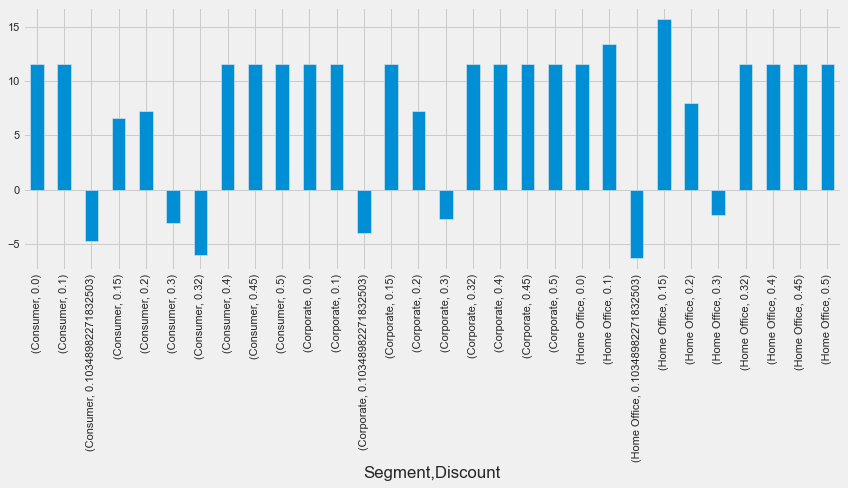

In [53]:
dis = store_df.groupby(['Segment','Discount']).Profit.median()
dis.plot(kind = 'bar', stacked = True)
plt.gcf().set_size_inches(12,7)
plt.tight_layout()